# 1 Компоненты кредитного риска

## 1.1 Определения и обозначения

**Кредитный риск** - событийный вид риска. 

Событие-триггер -- **дефолт**, под которым типично понимается отказ и неспособность исполнять свои финансовые обязательства по договору. 

Событие дефолта приводит к возникновению **кредитных потерь**.


**У кредитного риска отдельного кредита есть следующие атрибуты**:

* $t$ - текущий момент времени; момент оценки риска.

* $h >0$  - горизонт риска; будущий период, в течение которого кредитор подвержен риску дефолта; чаще всего ограничен сроком кредитного договора, но бывают и нюансы (например, бесрочная кредитная линия) 

* $\tau$ - момент дефолта, случайное событие в пределах горизонта риска.

* $PD_t (h) = P (\tau < t + h)$ (probability of default) - вероятность дефолта заемщика в течение  горизонта риска; может задаваться по-разному и является атрибутом модели; неубывающая функция распределения времени до дефолта.

* $SF_t(h) = 1 - PD_t(h)$ (survival function) - функция "дожития"; вероятность НЕ допустить дефолт на горизонте $h$.

* $EAD(\tau)$ (exposure-at-default) - экспозиция при дефолте; предельный уровень потерь, с которым вероятно предстоит столкнуться в случае объявления дефолта заемщиком в момент времени $\tau$; обычно определяется как размер законного требования к заемщику (условия контракта, нормы закона). Может быть как детерминированным, так и случайным.

* $LGD(\tau)$ (loss-given-default) - доля фактическая доля понесенных потерь относительно экспозиции; определяется с учетом обеспечения или очередности прав требований по обязательствам. Типично случайна, 
и в момент $\tau$ часто используется оценка, т.к. фактическое значение может быть устрановленно существенно позже.

**Механизм развития дефолта по кредиту**: 

1. Произошел ли дефолт на горизонте $h$? Если нет, то кредитные потери равны 0. 
2. Если да, тогда в какой момент $\tau$ произошел дефолт?
3. Какая уровень экспозиции к риску дефолта $EAD$ был в момент $\tau$?
4. Какой уровень фактических потерь $LGD$ понесен в результате дефолта

**Функцию (случайную) кредитных потерь по одному кредиту можно записать в следующем виде**:

$$L(\tau) = I(\tau< t+h) \cdot EAD(\tau) \cdot LGD(\tau),$$

где $I(\tau< t+h)$ - индикатор дефолта на горизонте $h$ и имеет распределение Бернулли $B_{PD_t(h)}$.

**Функцию (случайную) кредитных потерь по портфелю, состоящему из** $N$ **кредитов, можно записать в следующем виде:**

$$L^P(\tau) = \sum_{n = 1,\ldots, N} [I(\tau_n< t+h) \cdot EAD_n(\tau) \cdot LGD_n(\tau)],$$

!!! В данном курсе:

* подробно разбираемся с моделированием и оценкой $PD$
* рассматриваем случаи детерминированных $EAD$ (например, обыкновенные кредиты или облигации) и практикуемся в ее определении в момент дефолта
* $LGD$ рассматриваем как экзогенно заданную детерминированную или случайную величину
* также изучаем влияние корреляции дефолтов $\rho$ на портфельный кредитный риск (распределение убытков и $VaR$).



## 1.2 Арифметика PD

* Дискретная модель
  - дефолты наблюдаются только в определенные моменты времени в течение горизонта риска (напримере, только в моменты очередных платежей по кредиту); 
  - $PD_t(h) =\sum_{t_i < h} P_t(\tau = t_i) =  \sum_{t_i < h} P_t(\tau = t_i|\tau > t_{i-1}) [1 - P_t(\tau  \leq t_ {i-1})] = \sum_{t_i < h} P_t(\tau = t_i|\tau > t_{i-1}) SF_t(t_{i-1} - t)$
  
   т.е. сумма вероятностей столкнуться с дефолтом в очередную дату; по формуле полной вероятности;
  - может задаваться:
    - как точками распределения $PD_t(t_i -t)$, 
    - так и плотностью (маржинальными вероятностями) $P(\tau = t_i)$, 
    - так и условной плотностью (форвардными вероятностями) $P(\tau = t_i| \tau >t_{i-1})$.  

* Непрерывная модель 
  - дефолты могут возникать в любой момент времени
  - центральный объект - интенсивность дефолта $\lambda_t(x)$, а $PD_t(h) = 1 - e^{-\int_{0}^h \lambda_t(x)dx}$ 
  - $\lambda_t(x)$ (hazard function) - условная плотность дефолта в момент $x$ при условии, что до $x$ дефолт не произошел, т.е. $P_t(\tau \in (t+x, t+x +dx) | \tau > t+x) \approx \lambda_t(x) dx $.
  - $\lambda_t(x)$  - можно грубо интерпретировать как количество дефолтов на единицу времени в последовательности кредитов. 

* Гибрид - интерполированная дискретная модель
  - косочно-постоянная функция $\lambda (h)$: $P(\tau = t_i| \tau >t_{i-1}) = 1 - e^{-\sum_{i} \lambda_i \cdot(t_i - t_{i-1})}$
  - другая функция, например, сплайновая фунцкия.


### Задача 1

Известно, что форвардная однолетняя вероятнось дефолта заемщика постоянна и равна 2.5%. Заемщику выдан трехлетний кредит. Определите вероятность того, что заемщик допустить дефолт в течение двух последний лет кредита.

(2 балла)



In [ ]:
# Решение и альтернативные ответы

# Сумма маржинальных вероятностей дефолта в течение второго и третьего годов 

PD_1 = 0.025
PD_2 = (1 - PD_1)*PD_1
PD_3 = (1 - PD_1 - PD_2)*PD_1
PD_3 = (1 - PD_1)*(1 - PD_1)*PD_1

print('''Вероятность дефолта в течение двух последних лет контракта = {:.2%}, 
маржинальная на второй года = {:.2%}, 
маржинальная на год 3 = {:.2%}'''.format(PD_2 + PD_3, PD_2, PD_3))

Вероятность дефолта в течение двух последних лет контракта = 4.81%, 
маржинальная на второй года = 2.44%, 
маржинальная на год 3 = 2.38%


### Задача 2

Функция интенсивности дефолта заемщика имеет следующий вид:

$$\lambda(x) = 0.09 -0.07\cdot e^{- 0.9*x} $$

Опеределите следующие вероятности: вероятность дефолта заемщика в течение первого года, а также маржинальную и форвардные вероятности дефолта во втором полугодии.   

(2 балла)

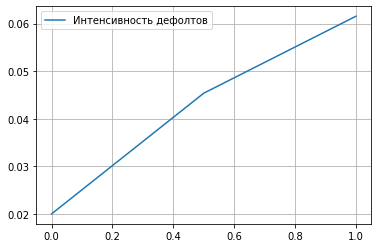

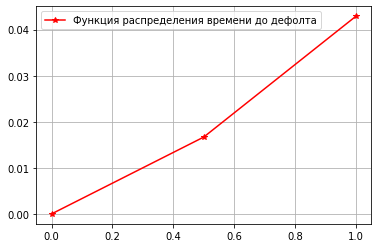

PD_cum(1) = 4.29%, PD_mrg = 2.62%, PD_frw = 2.67%, PD_frw_mod = 2.67%


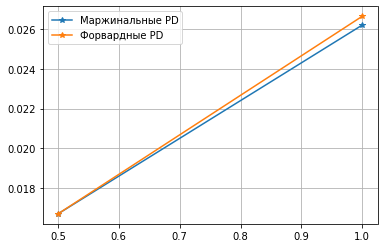

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

hzr_fun = np.vectorize( lambda x: 0.09 - 0.07*np.exp(-0.9*x)) # x - выражен в годах
pd_fun = np.vectorize(lambda x: 1 - np.exp(- integrate.quad(hzr_fun, 0, x)[0]))
pd_fun_mod = np.vectorize(lambda x,y: 1 - np.exp(- integrate.quad(hzr_fun, x, y)[0]))


# Если хочется посмотреть на графике
terms = np.arange(0, 1.5, 0.5)

plt.plot(terms, hzr_fun(terms), label = 'Интенсивность дефолтов')
plt.legend(), plt.grid()
plt.show()

plt.plot(terms, pd_fun(terms), '-r*' , label = 'Функция распределения времени до дефолта')
plt.legend(), plt.grid()
plt.show()

plt.plot(terms[1:], pd_fun(terms[1:]) - pd_fun(terms[:-1]), '-*', label = 'Маржинальные PD')
plt.plot(terms[1:], (pd_fun(terms[1:]) - pd_fun(terms[:-1]))/(1 - pd_fun(terms[:-1])), '-*', label = 'Форвардные PD')
plt.legend(), plt.grid()
plt.show

print('PD_cum(1) = {:.2%}, PD_mrg = {:.2%}, PD_frw = {:.2%}, PD_frw_mod = {:.2%}'.format(pd_fun(1), pd_fun(1) - pd_fun(0.5), (pd_fun(1) - pd_fun(0.5))/(1 - pd_fun(0.5)), pd_fun_mod(0.5, 1)))

### Задача 3

Известно, что заемщик может объявить дефолт каждые полгода. В таблице приведены маржинальные вероятности  дефолтов для каждой возможной даты в течение ближайших двух лет (см. таблицу):

| date   | PD |
|:--------|:----|
|01-01-2011| 2.50%|
|01-07-2011| 2.35%|
|01-01-2012 | 2.22%|
|01-07-2012| 2.17%|

Предполагая постоянство интенсивности дефолтов в течение каждого периода, определите интенсивность дефолтов в первом полугодии 2012 года и вероятность дефолта к 01-04-2012 года. При расчетах исходить из того, что в году 365 дней.

(3 балла)

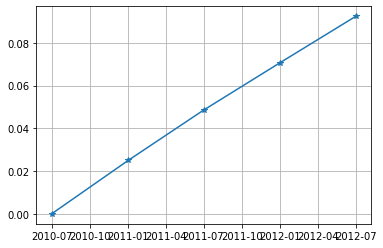

,dates,hzrds,pd_fwd,pd_cum
0,2011-01-01,0.050223,0.025000,0.0250
1,2011-07-01,0.049200,0.024103,0.0485
2,2012-01-01,0.046831,0.023332,0.0707
3,2012-07-01,0.047386,0.023351,0.0924


Интенсивность в первом полугодии 2012 года = 0.0474,
вероятность дефолта к 01-04-2012 = 8.16%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dates =np.arange('2010-07', '2013-01', dtype='datetime64[6M]').astype('datetime64[D]') 
pd_cum  = np.array([0, .025, .0235, .0222, .0217]).cumsum() # Значения функции распределения в даты
plt.plot(dates, pd_cum, '-*', label = 'Известные точки функции распределения')
plt.grid(), plt.show()

pd_fwd = (pd_cum[1:] - pd_cum[:-1])/(1 - pd_cum[:-1]) # значения форвардных PD на каждом участке
terms = (dates[1:] - dates[:-1]).astype('float')/365 # значения сроков (x) между платежами в годах для вычисления интенсивностей
hzr_imp =  - np.log(1 - pd_fwd)/terms # implied hazards для кусочно-постоянной интенсивности, решаем уравнение для каждого периода относительно интенсивности
display(pd.DataFrame({'dates':dates[1:], 'hzrds': hzr_imp, 'pd_fwd': pd_fwd, 'pd_cum': pd_cum[1:]}))

# Срок до 01-04-2012 c ближайшего прошлого момента 
term_1 = (np.datetime64('2012-04-01') - np.datetime64('2012-01-01')).astype('float')/365
print('Интенсивность в первом полугодии 2012 года = {:.4f},\nвероятность дефолта к 01-04-2012 = {:.2%}'.format(hzr_imp[-1], pd_cum[-2] + (1 - pd_cum[-2])*(1 - np.exp(-hzr_imp[-1]*term_1))))

### Задача 4

1 марта 2015 года заемщику выдан кредит объемом 24 млн. на два года. Выплаты по кредиту осуществляются 1го числа каждого месяца. В каждую выплату заемщик гасит 1/24 объема кредита и уплачивает проценты на остаток суммы долга после предыдущего платежа. Ставка по кредиту составляет 15% годовых. Конвенция счета дней act/360 (т.е. полная ставка расчитана на 360 дней, а размер платежа устанавливается пропорционально количеству фактически прошедших дней).

Известно, что заемщик допустил дефолт 21 июня 2016 г. Определите EAD.

(3 балла)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,terms,due,interest,EAD
2015-03-01,0.000000,24000.0,0.000000,24000.000000
2015-04-01,0.086111,24000.0,310.000000,24310.000000
2015-05-01,0.083333,23000.0,287.500000,23287.500000
2015-06-01,0.086111,22000.0,284.166667,22284.166667
2015-07-01,0.083333,21000.0,262.500000,21262.500000
2015-08-01,0.086111,20000.0,258.333333,20258.333333
2015-09-01,0.086111,19000.0,245.416667,19245.416667
2015-10-01,0.083333,18000.0,225.000000,18225.000000
2015-11-01,0.086111,17000.0,219.583333,17219.583333
2015-12-01,0.083333,16000.0,200.000000,16200.000000


Дата очередного платежа:  2016-07-01 00:00:00
EAD на дату 2016-06-21 равно 9075.00


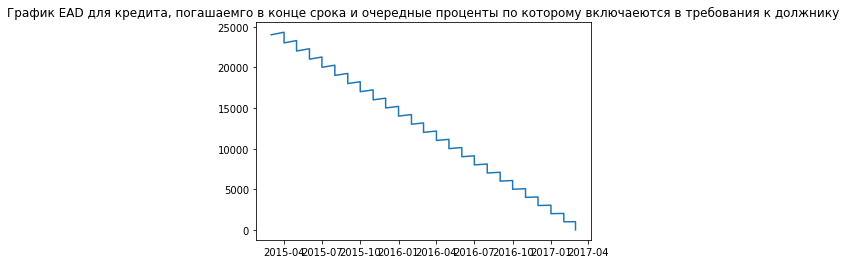

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal

V = 24000 # погашение равномерное
s = 2 # срок в годах
r = 15 # процентная ставка в % годовых; начисление дискретное; конвенция счета дней: act/365; 
m = 12 # столько раз в год; каждые полгода (не то же самое, что каждые 182 дня)   

# Составим таблицу (график) платежей
dates_int = np.arange('2015-03-01', '2017-04-01', dtype='datetime64[1M]').astype('datetime64[D]') #даты выплат по кредиту

# будем заполнять поля:
  # terms - срок с начала кредита
  # due - непогашенный остаток основного долга
  # interest - сумма очередной процентной выплаты
  # EAD - экспозиция при дефолте
data = pd.DataFrame(np.nan, index = dates_int, columns = ['terms', 'due', 'interest',  'EAD']) 
data.iloc[0,:] = [0,  V, 0 , V] # в момент выдачи кредита EAD = объему кредита без процентов 

data['terms'][1:] = (dates_int[1:] - dates_int[:-1]).astype('float')/360 # срок вычисляем в годах в соответствии с конвенцией счета дней (ставка процента расчитана на 365 дней, а сумма платежа вычисляется из количества фактически прошедших дней)
data['due'] = V 
data['due'][1:] = np.arange(V, 0, - V/24)
data['interest'][1:] = (r/100)*np.array(data["due"][1:])*data['terms'][1:]
data['EAD'] = data['due'] + data['interest'] # EAD складывается из суммы основного долга + накопленный процент

display(data)

# Посмотрим на график EAD от времени. Обращаем внимание, что экспозиция снижается сразу после уплаты процента, и возрастает по мере накопленния следующего
# Подготовим точки
time_plt = np.repeat(data.index, 2)[1:]
EAD_plt = np.repeat(data.EAD, 2)[1:] # локальные максимум EAD достигает в дни уплаты процента, т.е. когда сумма накопленного процента максимальна
EAD_plt[0:-1:2] = data.due[1:] # после очередной выплаты процента EAD падает до оставшейся суммы основного долга (если кредит погашается, эта часть постепенно снижается) 
EAD_plt[-1] = 0 #если кредит погашен, то EAD становится равно 0.

# Рисуем график
plt.plot(time_plt, EAD_plt)
plt.title('График EAD для кредита, погашаемго в конце срока и очередные проценты по которому включаеются в требования к должнику')

# Определим EAD на произвольную дату

dt = np.datetime64('2016-06-21') # Предположим, что дефолт объявлен 8 марта 2011 года
# EAD будет складываться из суммы непогашенного долга с момента последнего платежа и накопленного процента пропорционально сроку прошедшего также с момента уплаты последнего платежа

# Определим, в какой платежный период произошел дефолт
n =  next((i for i in range(data.shape[0]) if data.index[i] > dt), None) 
print('Дата очередного платежа: ', data.index[n]) # дата ближайшего платежа
accr_pr =  (dt - data.index[n-1]).days/360 # период до дефолта, за который успел накопиться очередной процент
print('EAD на дату {:} равно {:.2f}'.format(dt, data.due[n] + data.interest[n]*accr_pr/data.terms[n]))

# Задача 5

Портфель трейдера имеет следующие чувствительности доходности трем рыночных факторов:

- 1 к фондовому индексу
- -0.5 к курсу евро
- 0.43 к нефти

Факторы имеют следующие волатильности (ст.отклонения доходностей):

| |Индекс|Курс| Нефть|
|:-|:-:|:-:|:-:|
|Индекс|0.027|0.005|0.04|

Индекс имеет корреляции с валютным курсом и нефтью 0.3 и -0.15 соответственно; корреляция курса и нефти 0.6.

У трейдера есть возможность использовать фьючерс для хеджирования исходного портфеля. Текущая стоимость фьючерса 0, чувствительности одного контракта к фондовому индексу 10000 долларов, к курсу евро -27000 долларов. К нефти стоимость фьючера нечувствительна.

Риск порфтеля оценивается VaR 99% дельта-нормальным методом.


Чему равны: 
1. текущий риск портфеля в долларах,
2. минимальный риск в %, которого можно добиться путем хеджирования портфеля фьючерсом.

Указание: предполагать, что во фьючерсе можно занять сколь угодно дробную позицию. 






In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as ss

# Стоимость порфтеля
V = 20_000 # тыс.

# Уровень VaR
level = .99
# Чувствительности исходного порфтеля
s = pd.Series([1, -0.5, 0.43], index = ['Inx', 'FX', 'Oil'])

# Волатильности факторов
f_vlt = pd.Series([0.027, 0.005, 0.04], index = ['Inx', 'FX', 'Oil'])

# Корреляционная матрица
f_crr  = np.array([[1, 0.3, -0.15],[0.3, 1, 0.6], [-0.15, 0.6, 1]])

# Ковариационная матрица факторов
cov = pd.DataFrame(np.diag(f_vlt) @ f_crr @ np.diag(f_vlt).T, index = ['Inx', 'FX', 'Oil'], columns = ['Inx', 'FX', 'Oil'])

# Решение п. 1 - найти риск-портфеля в деньгах

# Сигма доходности портфеля 
sigma_prt = np.sqrt(s @ cov @ s.T)

# VaR портфеля (в % от стоимости портфеля)
VaR_rel = sigma_prt*ss.norm.ppf(level)
VaR_abs = VaR_rel*V
print('''Текущий VaR 99% в %, {:.2%}
VaR 99% в деньгах {:.2f}'''.format(VaR_rel, VaR_abs))

# Решение п.2

# Перейдем к чувствительностям в деньгах (в тыс. долларов)

h = pd.Series([10, -27, 0], index = ['Inx', 'FX', 'Oil'])

s_m = s*V # в тыс. долларов

x = - (h @ cov @ s_m.T)/(h @ cov @ h.T)
s_new = s_m + x*h
sigma_prt = np.sqrt(s_new @ cov @ s_new.T) # сигма изменений стоимости портфеля
VaR_abs = sigma_prt*ss.norm.ppf(level)
VaR_rel = VaR_abs/V

print('''\nМинимальный VaR 99% в %, {:.2%}
VaR 99% в деньгах {:.2f}'''.format(VaR_rel, VaR_abs))

Текущий VaR 99% в %, 6.58%
VaR 99% в деньгах 1315.71

Минимальный VaR 99% в %, 5.41%
VaR 99% в деньгах 1081.06
